In [1]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy import signal
from scipy.fftpack import fft, ifft
import time
from anomaly_detection import anomaly_detection
pd.set_option('display.max_columns', 51)
font = {'family' : 'Consolas',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
import os 
dir_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(dir_path, '../data'))
print (data_dir)
combined_pkl = os.path.join(data_dir, "combine.pkl")
combined_pkg_tbl = os.path.join(data_dir, 'combine_table.pkl')
part1_pkl = os.path.join(data_dir, "Part1.pkl")
part2_pkl = os.path.join(data_dir, "Part2.pkl")
%matplotlib inline

Using TensorFlow backend.


/home/aind2/workspace/unu_bhp_2018/data


In [2]:
file_df = pd.read_pickle(combined_pkl)

file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469681 entries, 0 to 469680
Data columns (total 89 columns):
hackathon4_x                                                               469681 non-null object
TimeStamp                                                                  469681 non-null datetime64[ns]
05-PT-28201-01_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-28201-03_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-02_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-03_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-02_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-03_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-34101-01_H1_Manifold_Pressure (Psi)                                  469681 non-null 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.03263, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.03263 to 0.03002, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
Epoch 00004: val_loss improved from 0.03002 to 0.02256, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
Epoch 00005: val_loss improved from 0.02256 to 0.01698, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
Epoch 00006: val_loss improved from 0.01698 to 0.01292, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
Epoch 00007: val_loss improved from 0.01292 to 0.01056, saving 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


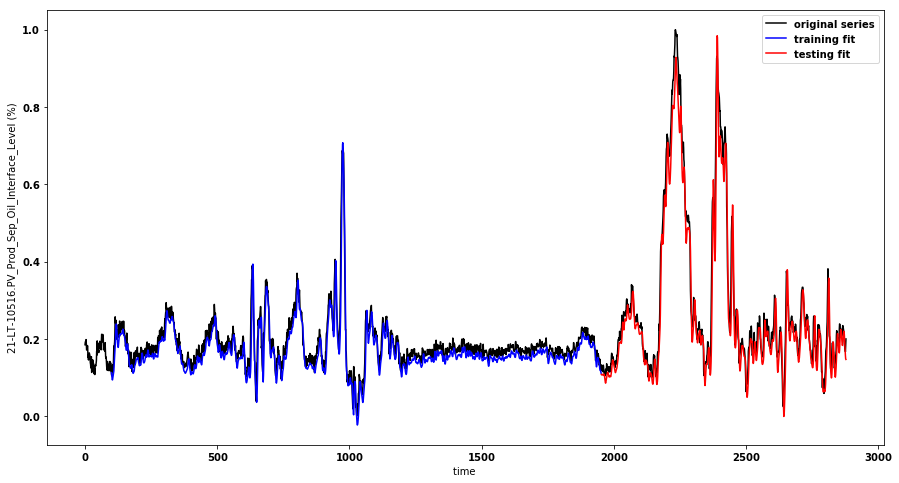

In [3]:
anomaly_detection = anomaly_detection(sequence_length=100, batch_size=128, epochs=60, dropout=0.6, verbose = 0)
start = time.time()
start_time = datetime(2016, 11, 15,10,0)
end_time = datetime(2016, 11, 16, 10,0)
time_range= (file_df["TimeStamp"] < end_time) & (file_df["TimeStamp"] > start_time)
column_name = "21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)"
time_series = file_df[time_range][column_name]
anomaly_detection.set_name(column_name)
anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = False)

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


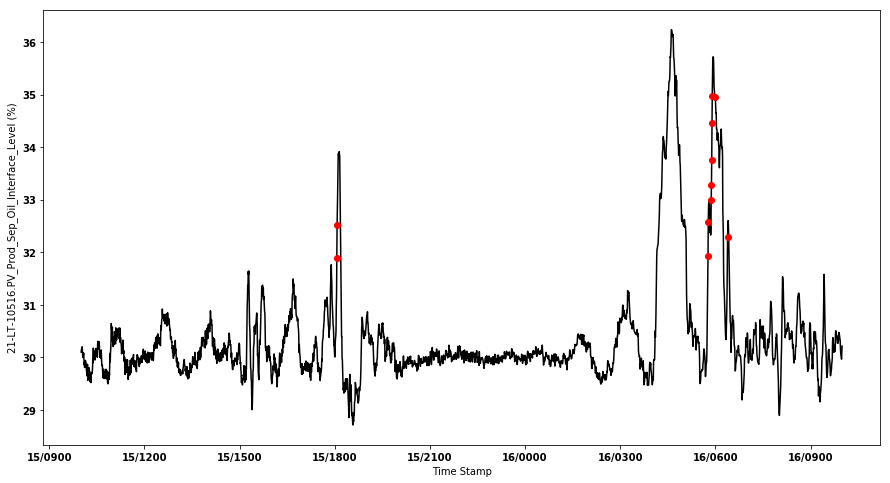

In [4]:
datefmt = mdates.DateFormatter('%d/%H%M')

anomalies = anomaly_detection.find_anomaly(error_level=0.15)
if anomalies.any():
    fig, ax = plt.subplots(figsize=(15,8))
    x = np.asarray(file_df[time_range]['TimeStamp'])
    y = np.asarray(time_series)
    ax.plot(x, y, color='k')
    for i in anomalies:
        ax.plot(x[i],y[i],'ro')
    ax.xaxis.set_major_formatter(datefmt)
    plt.xlabel('Time Stamp')
    plt.ylabel(column_name)

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fo

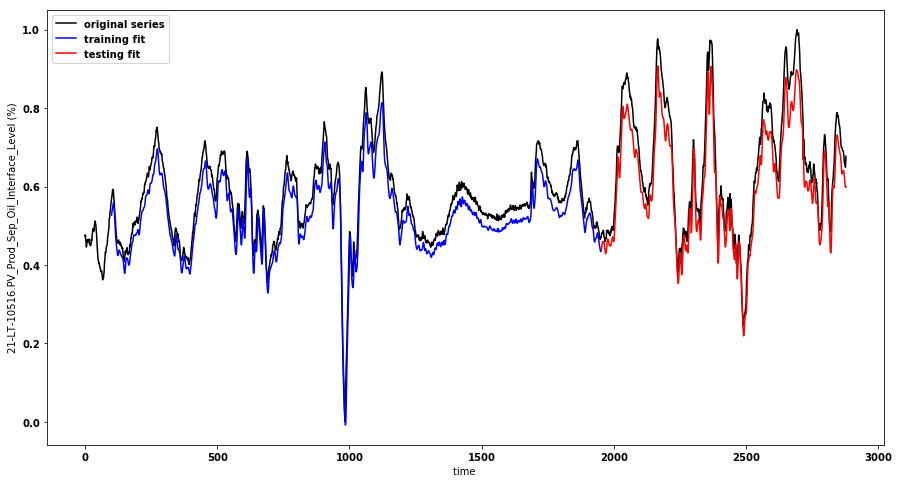

In [5]:
column_name = "05-PT-29101-02_C1_Manifold_Pressure (Psi)"
time_series = file_df[time_range][column_name]
anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = False)

anomaly_detection.set_name(column_name)

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


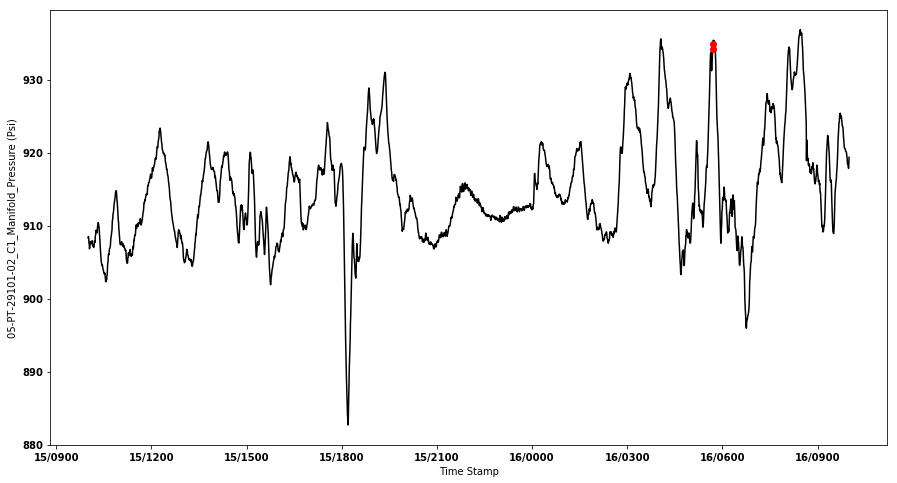

In [9]:
anomalies = anomaly_detection.find_anomaly(error_level=0.15)
if anomalies.any():
    fig, ax = plt.subplots(figsize=(15,8))
    x = np.asarray(file_df[time_range]['TimeStamp'])
    y = np.asarray(time_series)
    ax.plot(x, y, color='k')
    for i in anomalies:
        ax.plot(x[i],y[i],'ro')
    ax.xaxis.set_major_formatter(datefmt)
    plt.xlabel('Time Stamp')
    plt.ylabel(column_name)

In [ ]:
datefmt = mdates.DateFormatter('%Y/%m/%d %H:%M')
column_names = ["05-TT-29101-03_C1_Manifold_Temperature (DegF)",
"05-TT-29101-02_C1_Manifold_Temperature (DegF)", 
"05-PT-29101-02_C1_Manifold_Pressure (Psi)",
"05-PT-29101-03_C1_Manifold_Pressure (Psi)",
"05-TT-34101-04_H1_Manifold_Temperature (DegF)",
"05-TT-34101-01_H1_Manifold_Temperature (DegF)",
"05-PT-34101-04_H1_Manifold_Pressure (Psi)",
"05-PT-34101-01_H1_Manifold_Pressure (Psi)",
"05-TT-28201-01_B2_Manifold_Temperature (DegF)",
"05-TT-28201-03_B2_Manifold_Temperature (DegF)",
"05-PT-28201-01_B2_Manifold_Pressure (Psi)",
"05-PT-28201-03_B2_Manifold_Pressure (Psi)",
"05-PT-28201-01_B2_Manifold_Pressure (Psi)",
"05-PT-28201-03_B2_Manifold_Pressure (Psi)",
"05-PT-28201-01_B2_Manifold_Pressure (Psi)",
"05-PT-28201-03_B2_Manifold_Pressure (Psi)"]

for column_name in column_names:
    time_series = file_df[time_range][column_name]
    name = f"{column_name}_{start_time}_{end_time}"
    print(f"Processing: {name}")
    anomaly_detection.set_name(name)
    anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = True)
    anomalies = anomaly_detection.find_anomaly(error_level=0.15)
    if anomalies.any():
        print(f"Found {len(anomalies)} anomalies in {column_name} between {start_time} and {end_time}")
        fig, ax = plt.subplots(figsize=(30,15))
        x = np.asarray(file_df[time_range]['TimeStamp'])
        y = np.asarray(time_series)
        ax.plot(x, y, color='b')
        for i in anomalies:
            ax.plot(x[i],y[i],'ro')
        ax.xaxis.set_major_formatter(datefmt)
        plt.xlabel('Time Stamp')
        plt.ylabel(column_name)
        figure_name = os.path.join(data_dir, name + "_anomalies.png")
            
        plt.savefig(figure_name)
    else:
        print(f"Found no anomalies in {column_name} between {start_time} and {end_time}")

Processing: 05-TT-29101-03_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00035, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-03_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss improved from 0.00035 to 0.00029, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-03_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00015: val_loss improved from 0.00029 to 0.00013, saving model to /home/aind2/work

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Found no anomalies in 05-TT-29101-03_C1_Manifold_Temperature (DegF) between 2016-11-15 10:00:00 and 2016-11-16 10:00:00
Processing: 05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.07378, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.07378 to 0.03342, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss improved from 0.03342 to 0.02307, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00003: val_loss improved from 0.02307 to 0.02132, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.02132 to 0.02116, saving model to /home/aind2/

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00799, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.00799 to 0.00781, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00007: val_loss improved from 0.00781 to 0.00679, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00008: val_loss improved from 0.00679 to 0.00577, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00230, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.00230 to 0.00220, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00004: val_loss improved from 0.00220 to 0.00133, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.00133 to 0.00132, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00007: val_loss improved from 0.00132 to 0.00130, saving

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00147, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.00147 to 0.00133, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss improved from 0.00133 to 0.00132, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00003: val_loss improved from 0.00132 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00004: val_loss improved from 0.00130 to 0.00127, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_20

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-01_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.00130 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-01_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017:

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-04_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.00130 to 0.00129, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-04_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017: val_los

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Processing: 05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.00131, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.00131 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017: val_los

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.01743, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss improved from 0.01743 to 0.01730, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017:

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.01090, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.01090 to 0.00992, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss improved from 0.00992 to 0.00992, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weig

Found 20 anomalies in 05-TT-28201-03_B2_Manifold_Temperature (DegF) between 2016-11-15 10:00:00 and 2016-11-16 10:00:00
Processing: 05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.01797, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss improved from 0.01797 to 0.01780, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00006: val_loss improved from 0.01780 to 0.01637, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00007: val_loss improved from 0.01637 to 0.01630, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00008: val_loss im

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.05212, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.05212 to 0.02721, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss improved from 0.02721 to 0.01934, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00003: val_loss improved from 0.01934 to 0.01447, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00004: val_loss improved from 0.01447 to 0.01348, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_20

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.02412, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss improved from 0.02412 to 0.02168, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00005: val_loss improved from 0.02168 to 0.01880, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00006: val_loss improved from 0.01880 to 0.01772, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss im

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Epoch 00000: val_loss improved from inf to 0.02831, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00001: val_loss improved from 0.02831 to 0.02379, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.02379 to 0.01962, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00004: val_loss improved from 0.01962 to 0.01251, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
Epoch 00005: val_loss improved from 0.01251 to 0.01036, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold